<a href="https://colab.research.google.com/github/SnehalJT/Major_Project/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/owid-covid-data.csv')

In [3]:
data.shape

(85579, 59)

In [4]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85574,ZWE,Africa,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,2569.548,1.817,2.028,105.296,0.000,0.096,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,488826.0,32.889,0.136,1716.0,0.115,0.018,56.9,tests performed,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85575,ZWE,Africa,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,2572.508,2.960,2.086,105.430,0.135,0.115,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85576,ZWE,Africa,Zimbabwe,2021-04-30,38257.0,22.0,30.286,1567.0,0.0,1.571,2573.988,1.480,2.038,105.430,0.000,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500342.0,414735.0,85607.0,22745.0,19194.0,3.37,2.79,0.58,1291.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85577,ZWE,Africa,Zimbabwe,2021-05-01,38260.0,3.0,28.000



---



Preprocessing



---



In [5]:
# Temporary data set - temp_data

# Delete columns with higher null values
delete_columns = ['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate',
       'tests_per_case', 'tests_units', 'reproduction_rate', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million']
temp_data = data.drop(delete_columns, axis=1)
temp_data = temp_data.dropna(thresh=15)

In [6]:
# Fill column with zero if null exist and delete remaining catogorical data

columns_with_more_zeros = ['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
temp_data[columns_with_more_zeros] = temp_data[columns_with_more_zeros].fillna(temp_data[columns_with_more_zeros].mean())
temp_data = temp_data.dropna()

In [7]:
# temp_data.isnull().sum()

In [8]:
# To replace OWID_KOS to KOS

temp_data['iso_code'].replace(['OWID_KOS'],'KOS', inplace=True)

In [9]:
# np.unique(temp_data['iso_code'], return_counts=True)

In [10]:
# Change into currect format

temp_data['date'] = pd.to_datetime(temp_data['date'])
temp_data['total_cases'] = temp_data['total_cases'].astype(int)
temp_data['new_cases'] = temp_data['new_cases'].astype(int)
temp_data['total_deaths'] = temp_data['total_deaths'].astype(int)
temp_data['new_deaths'] = temp_data['new_deaths'].astype(int)
temp_data['population'] = temp_data['population'].astype(int)

In [11]:
########### Normalization if required ################
# from sklearn.preprocessing import MinMaxScaler
# norm = MinMaxScaler()
# temp_data.iloc[0:, 4:14] = norm.fit_transform(temp_data.iloc[0:, 4:14])

In [12]:
# temp_data.info()

In [14]:
# iso_code
USA = temp_data[temp_data['location'] == 'United States']
IND = temp_data[temp_data['location'] == 'India']

# Just change iso_code 
data_Country = IND

data_Country = data_Country.rename(columns={'date':'ds','total_deaths':'y'})



---
Model Data


---




In [15]:
# fbProphet
model = Prophet(changepoint_prior_scale=0.9,  yearly_seasonality=True , daily_seasonality=True)
model.fit(data_Country)
forecast = model.make_future_dataframe(periods=30,freq='D')
forecast = model.predict(forecast)



---
Interpreting Data


---





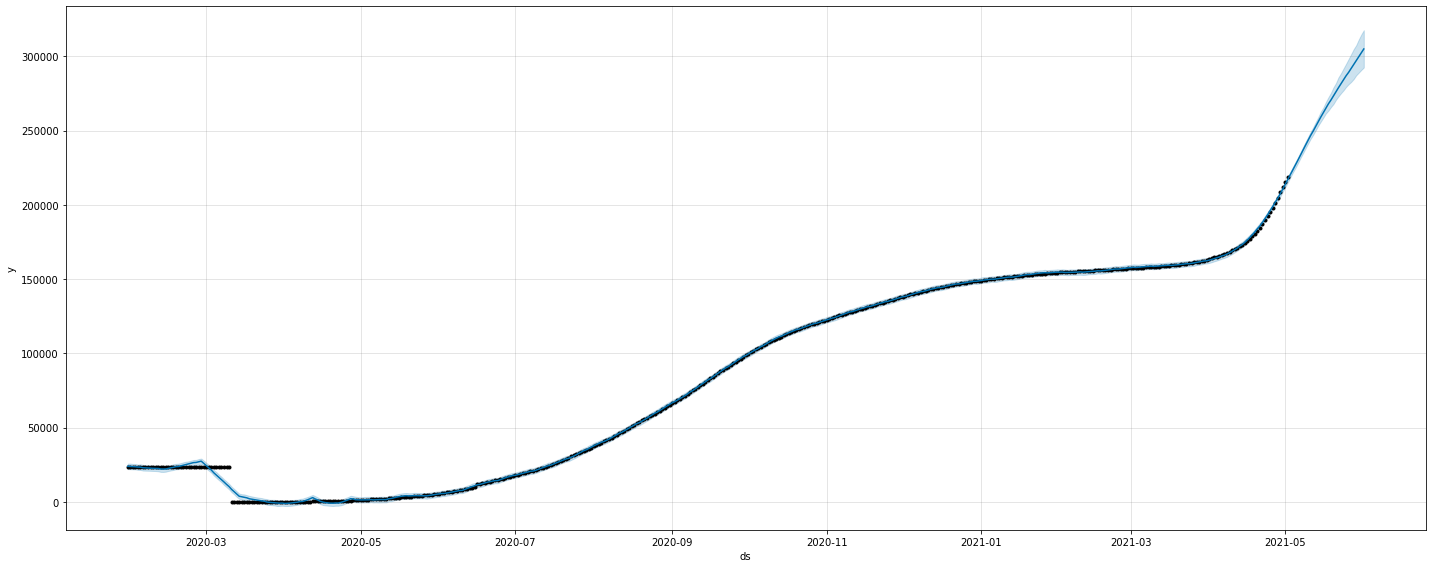

In [16]:
model.plot(forecast,figsize=(20,8));

In [17]:
forecast['yhat'].tail(100)

389    156558.499683
390    156840.709476
391    156743.593234
392    156970.627411
393    157201.714160
           ...      
484    294417.892399
485    297058.525994
486    299648.823870
487    302211.556572
488    304895.938080
Name: yhat, Length: 100, dtype: float64